# Heart Stroke Prediction #

## Importing Libraries ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,RobustScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler, StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
data = pd.read_csv('/mnt/c/Users/mercg/Desktop/PY/DS/stroke.csv', index_col='ID') #Loading Dataset
data.head()

,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
ID,,,,,,,,,,,,,,,,,,,,,
1,78,Female,0,0,1,Private,Rural,267.30,36.2,Formerly smoked,...,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South,0
2,60,Female,0,0,0,Private,Rural,207.24,19.8,Never smoked,...,Vegetarian,0,0,9,0,Secondary,High,56,East,0
3,69,Male,0,0,0,Private,Urban,161.30,34.5,Never smoked,...,Mixed,1,0,3,0,Secondary,High,63,North,1
4,43,Male,0,0,1,Never Worked,Urban,247.49,48.8,Never smoked,...,Mixed,0,1,4,0,Tertiary,Middle,93,South,0
5,30,Female,0,0,1,Government,Urban,116.57,31.3,Formerly smoked,...,Mixed,0,1,9,0,Secondary,High,99,West,0


## Data Preprocessing ##

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,172000.0,54.009826,21.076357,18.0,36.00,54.00,72.00,90.0
Hypertension,172000.0,0.150134,0.357203,0.0,0.00,0.00,0.00,1.0
Heart Disease,172000.0,0.100279,0.300373,0.0,0.00,0.00,0.00,1.0
Ever Married,172000.0,0.300965,0.458679,0.0,0.00,0.00,1.00,1.0
Average Glucose Level,172000.0,184.931265,66.314107,70.0,127.54,184.76,242.44,300.0
BMI,172000.0,30.012799,11.570356,10.0,20.00,30.00,40.10,50.0
Alcohol Consumption,172000.0,0.200169,0.400128,0.0,0.00,0.00,0.00,1.0
Chronic Stress,172000.0,0.250000,0.433014,0.0,0.00,0.00,0.25,1.0
Sleep Hours,172000.0,7.500221,2.875179,3.0,5.00,7.00,10.00,12.0
Family History of Stroke,172000.0,0.148948,0.356038,0.0,0.00,0.00,0.00,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172000 entries, 1 to 172000
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       172000 non-null  int64  
 1   Gender                    172000 non-null  object 
 2   Hypertension              172000 non-null  int64  
 3   Heart Disease             172000 non-null  int64  
 4   Ever Married              172000 non-null  int64  
 5   Work Type                 172000 non-null  object 
 6   Residence Type            172000 non-null  object 
 7   Average Glucose Level     172000 non-null  float64
 8   BMI                       172000 non-null  float64
 9   Smoking Status            172000 non-null  object 
 10  Physical Activity         172000 non-null  object 
 11  Dietary Habits            172000 non-null  object 
 12  Alcohol Consumption       172000 non-null  int64  
 13  Chronic Stress            172000 non-null  int64 

In [5]:
print(f'Missing Values:') # Checking null values
print(data.isna().sum())

Missing Values:
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Ever Married                0
Work Type                   0
Residence Type              0
Average Glucose Level       0
BMI                         0
Smoking Status              0
Physical Activity           0
Dietary Habits              0
Alcohol Consumption         0
Chronic Stress              0
Sleep Hours                 0
Family History of Stroke    0
Education Level             0
Income Level                0
Stroke Risk Score           0
Region                      0
Stroke Occurrence           0
dtype: int64


In [6]:
print('Duplicated Values:') #Checking Duplicate values
print(data.duplicated().sum())

Duplicated Values:
0


### Separating numerical and object columns for further preprocessing

In [7]:
num_col = [col for col in data.columns if data[col].dtype in ['int64','float64']]
num_col

['Age',
 'Hypertension',
 'Heart Disease',
 'Ever Married',
 'Average Glucose Level',
 'BMI',
 'Alcohol Consumption',
 'Chronic Stress',
 'Sleep Hours',
 'Family History of Stroke',
 'Stroke Risk Score',
 'Stroke Occurrence']

In [8]:
obj_col = [col for col in data.columns if data[col].dtype in ['object']]
data[obj_col]

,Gender,Work Type,Residence Type,Smoking Status,Physical Activity,Dietary Habits,Education Level,Income Level,Region
ID,,,,,,,,,
1,Female,Private,Rural,Formerly smoked,Sedentary,Non-Vegetarian,Tertiary,Middle,South
2,Female,Private,Rural,Never smoked,Light,Vegetarian,Secondary,High,East
3,Male,Private,Urban,Never smoked,Sedentary,Mixed,Secondary,High,North
4,Male,Never Worked,Urban,Never smoked,Active,Mixed,Tertiary,Middle,South
5,Female,Government,Urban,Formerly smoked,Light,Mixed,Secondary,High,West
...,...,...,...,...,...,...,...,...,...
171996,Female,Children,Rural,Never smoked,Sedentary,Vegetarian,No education,Middle,West
171997,Female,Children,Rural,Never smoked,Moderate,Vegetarian,Primary,Low,East
171998,Female,Private,Urban,Never smoked,Active,Vegetarian,Secondary,Middle,East


In [9]:
obj_col

['Gender',
 'Work Type',
 'Residence Type',
 'Smoking Status',
 'Physical Activity',
 'Dietary Habits',
 'Education Level',
 'Income Level',
 'Region']

### Checking for Outliers ###

In [10]:
def outlier_checker(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier = data.loc[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)]
    return outlier

In [11]:
outliers = pd.DataFrame()
for col in num_col:
    outliers_in_col = outlier_checker(data, col)
    outliers = pd.concat([outliers,outliers_in_col])
outliers.reset_index(drop=True, inplace=True)

In [12]:
print(f'Data: {len(data)} --- Outliers: {len(outliers)}')

Data: 172000 --- Outliers: 163215


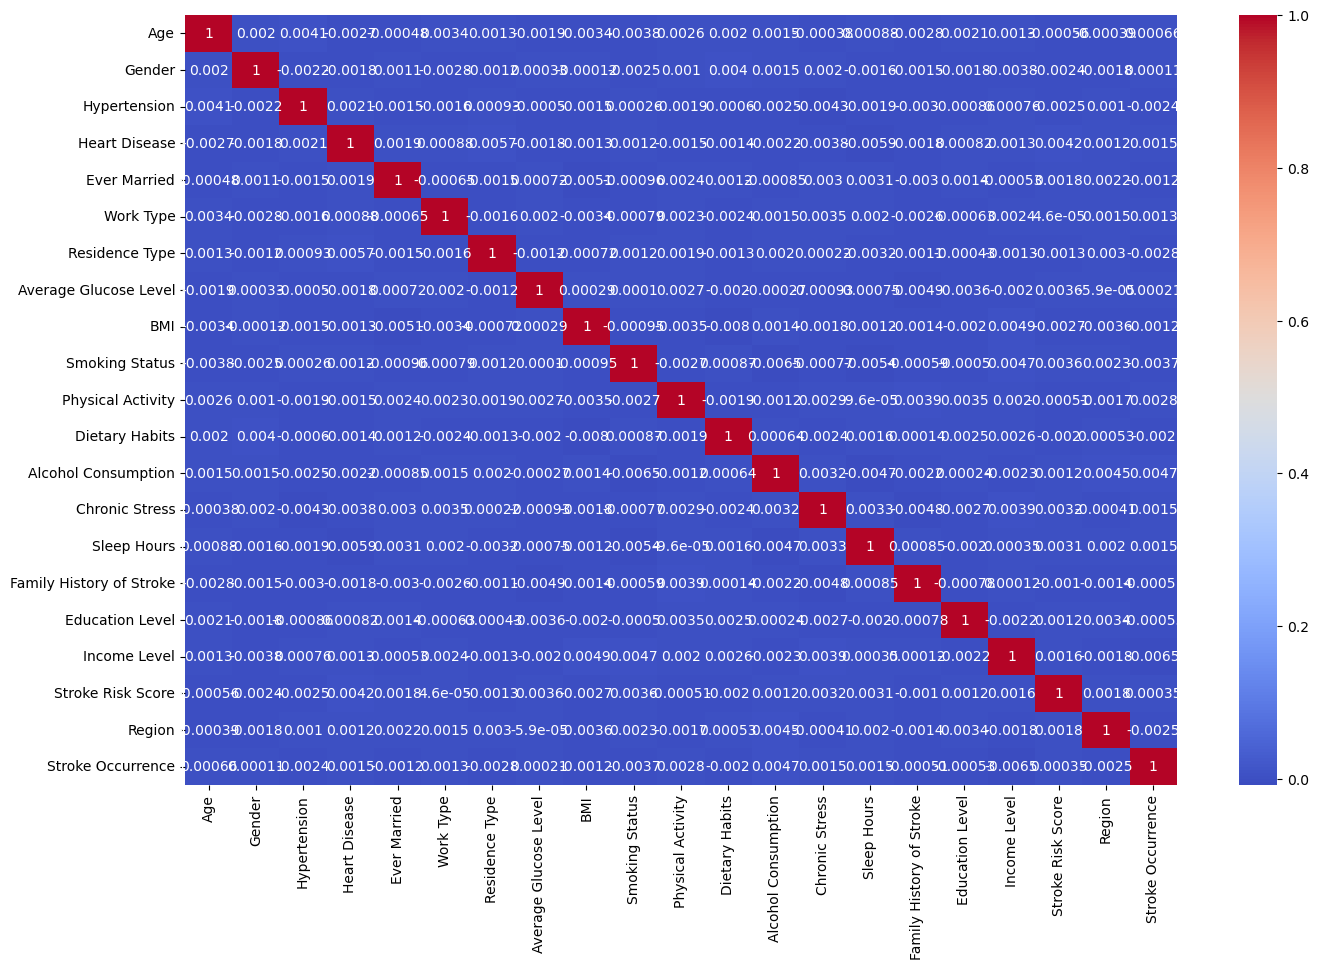

In [13]:
label_encoders = {}
for column in obj_col:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
corr = data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.show()

In [14]:
data.head()

,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
ID,,,,,,,,,,,,,,,,,,,,,
1,78,0,0,0,1,3,0,267.30,36.2,0,...,1,0,0,11,0,3,2,88,2,0
2,60,0,0,0,0,3,0,207.24,19.8,1,...,2,0,0,9,0,2,0,56,0,0
3,69,1,0,0,0,3,1,161.30,34.5,1,...,0,1,0,3,0,2,0,63,1,1
4,43,1,0,0,1,2,1,247.49,48.8,1,...,0,0,1,4,0,3,2,93,2,0
5,30,0,0,0,1,1,1,116.57,31.3,0,...,0,0,1,9,0,2,0,99,3,0


## Splitting Training and Testing Data

In [15]:
X = data.drop(['Stroke Occurrence'], axis=1)
y = data['Stroke Occurrence']

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [17]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Multiple model training

In [18]:
models = {
    'Logistic regression': LogisticRegression(),
    'Random forest classifier': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'K-nearnest neighbors': KNeighborsClassifier(n_neighbors=4),
    'Decision tree classifier': DecisionTreeClassifier()
}

In [19]:
def eval_models(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds,average='weighted', zero_division=0)
    recall = recall_score(y_test, preds,average='weighted', zero_division=0)
    return accuracy, precision, recall

In [20]:
results = []
for name, model in models.items():
    accuracy, precision, recall = eval_models(model, X_train_scaled, X_test, y_train, y_test)
    results.append({
        'Model':name,
        'Accuracy':accuracy,
        'Precision':precision,
        'Recall':recall
    })
res = pd.DataFrame(results)
res

/home/merc/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/merc/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/merc/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/merc/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,Model,Accuracy,Precision,Recall
0,Logistic regression,0.901250,0.812252,0.901250
1,Random forest classifier,0.901250,0.812252,0.901250
2,XGBoost,0.883081,0.819306,0.883081
3,K-nearnest neighbors,0.901250,0.812252,0.901250
4,Decision tree classifier,0.892703,0.820741,0.892703
